## Mission 1. Neflix and Code

호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편,  
넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

<!-- ![image.png](attachment:image.png) -->
<img src="https://image.ytn.co.kr/general/jpg/2022/1019/202210191531100565_t.jpg" width="400" align="center">


-----
### Mandatory Part:
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:  
Q1. 한국 작품은 총 얼마나 있는가?

- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

### Bonus Part:
Q2. 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?  
country column을 기준으로 한다.  
단일 국가인 경우를 기준으로 결과를 구해보자.

In [2]:
from google.colab import files
import numpy as np
import pandas as pd

root= './netflix_titles.csv'
netflix= pd.read_csv(root)
netflix.head(20)
# netflix.columns
# netflix.shape

print(pd.isna(netflix['country']).sum())
netflix.dropna(axis=0, subset=['country'], inplace= True)
print(pd.isna(netflix['country']).sum())
netflix.head()
# netflix.dropna?

831
0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [3]:
print(pd.isna(netflix['country']).sum())
netflix.dropna(axis=0, subset=['country'], inplace= True)
print(pd.isna(netflix['country']).sum())
netflix.head()
# netflix.dropna?

0
0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [4]:
cond= netflix['country'] == 'South Korea'
print(cond.sum())
print(cond.value_counts())
N_Kcontents= cond.value_counts()[1]

print('A number of K-contents on Netflix is', N_Kcontents)

199
False    7777
True      199
Name: country, dtype: int64
A number of K-contents on Netflix is 199


In [5]:
netflix['country']

0                                           United States
1                                            South Africa
4                                                   India
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 7976, dtype: object

In [6]:
multi_country= netflix["country"].str.contains(",")
multi_country

0       False
1       False
4       False
7        True
8       False
        ...  
8801     True
8802    False
8804    False
8805    False
8806    False
Name: country, Length: 7976, dtype: bool

In [7]:
single_country= netflix[multi_country == 0]

print(len(single_country))
single_country.head()


6656


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [8]:
netflix['country'].describe()

count              7976
unique              748
top       United States
freq               2818
Name: country, dtype: object

In [9]:
top_country= netflix['country'].describe().top #United State

In [10]:
N_top_country= (netflix['country'] == top_country).sum()

print("The single country produced the most content is the %s, producing a total of %i."%(top_country,N_top_country))

The single country produced the most content is the United States, producing a total of 2818.


------
-------
## Mission 2. 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 Moving Average(이동평균법) 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

<!-- ![image.png](attachment:image.png) -->
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOF6D7CMNgHI97AuU6oNZcWG0D6G4NVpTm0g&usqp=CAU" align="center">

-----
### Mandatory Part
다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

(https://www.kaggle.com/datasets/rishidamarla/bitcoin-prices-20112015)

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.  


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
bitfile= files.upload()
bit= pd.read_csv('./BitCoin.csv')
bit.head()

Saving BitCoin.csv to BitCoin (1).csv


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [17]:
bit['ymd']=pd.to_datetime(bit['Date'])

bit.head(3)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,ymd
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,2017-09-22
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,2017-09-21
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,2017-09-20


In [18]:
ym= bit['ymd'].dt.year + (bit['ymd'].dt.month)/120 #e.g., yyyy년 12월 >>> yyyy.1, yyyy년 6월 >>>> yyyy.05
bit['cond']=ym
bit1617= bit[(bit['cond'] >= 2016.05 ) & (bit['cond'] <= 2017.05)]

bit1617=bit1617[::-1] #https://rfriend.tistory.com/518 [::-1] & flip 비교


bit1617.sort_values(by='ymd', inplace=True) 

bit1617.set_index(keys=bit1617.ymd, inplace=True)
bit1617.head(20)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,ymd,cond
ymd,,,,,,,,,,
2016-06-01,625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,2016-06-01,2016.05
2016-06-02,594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,2016-06-02,2016.05
2016-06-03,565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000,2016-06-03,2016.05
2016-06-04,534,2016-06-04,424.28,424.53,422.73,423.41,59091000.0,6533260000,2016-06-04,2016.05
2016-06-05,504,2016-06-05,447.94,461.38,447.07,459.60,72796800.0,6947800000,2016-06-05,2016.05
2016-06-06,473,2016-06-06,574.60,586.47,574.60,585.54,72138900.0,8977700000,2016-06-06,2016.05
2016-06-07,443,2016-06-07,670.42,681.90,670.42,677.33,134961000.0,10550300000,2016-06-07,2016.05
2016-06-08,412,2016-06-08,575.03,588.40,569.47,587.78,80797300.0,9083510000,2016-06-08,2016.05
2016-06-09,381,2016-06-09,606.51,610.83,605.09,610.44,78529100.0,9614140000,2016-06-09,2016.05


In [19]:
mavr= np.convolve(bit1617.Open, np.ones(5), 'valid') / 5
nanarr= np.empty(4)
nanarr[:]= np.nan
mavr= np.append(nanarr,mavr)

bit1617['movingAvr']=mavr
bit1617.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,ymd,cond,movingAvr
ymd,,,,,,,,,,,
2016-06-01,625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,2016-06-01,2016.05,NaN
2016-06-02,594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,2016-06-02,2016.05,NaN
2016-06-03,565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000,2016-06-03,2016.05,NaN
2016-06-04,534,2016-06-04,424.28,424.53,422.73,423.41,59091000.0,6533260000,2016-06-04,2016.05,NaN
2016-06-05,504,2016-06-05,447.94,461.38,447.07,459.60,72796800.0,6947800000,2016-06-05,2016.05,418.238


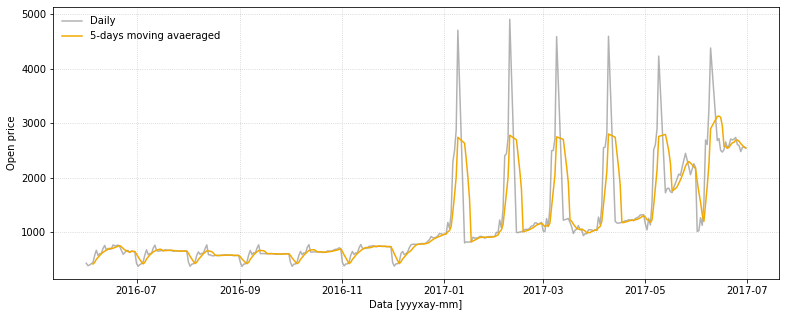

In [20]:
plt.figure(figsize=(13,5))
# plt.plot?
plt.plot(bit1617.Open, color='gray', alpha= 0.6, label= 'Daily')
plt.plot(bit1617.movingAvr, color='#f2a900', label='5-days moving avaeraged')
plt.xlabel('Data [yyyxay-mm]')
plt.ylabel('Open price')

plt.legend(frameon= False)

plt.grid(True, axis='y', color='gray', alpha=0.4, linestyle=':')
plt.grid(True, axis='x', color='gray', alpha=0.4, linestyle=':')

plt.show()